# Bayesian statistics
### Jack Bennetto
#### February 15, 2019

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Objectives

 * Describe the difference between Frequentist and Bayesian statistics
#### Frequentists use probability only to model certain processes broadly described as "sampling." 
#### Bayesians use probability more widely to model both sampling and other kinds of uncertainty.  
 * Use Bayes' theorem to calculate posterior probabilities
#### The posterior probability  is calculated by updating the prior probability using Bayes' theorem. 
     P(𝐻|𝐗) = the likelihood *the prior probability/ the normalizing constant

## Agenda

* Compare Frequentist and Bayesian approaches
* Review Bayes' theorem
#### Bayes' theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event
* Calculate posterior probabilities

## Objectives

 * Describe the difference between Frequentist and Bayesian statistics
 * Use Bayes' theorem to calculate posterior probabilities 

## Agenda

* Compare Frequentist and Bayesian approaches
* Review Bayes' theorem
* Calculate posterior probabilities

So far we've discussed Frequentist statistics. Let's review this a bit.

What is likelihood?

What is MLE?

What is a confidence interval?

## Frequentist vs Bayesians

**Question:** What is statistics?

When people talk about statistics they usually mean **Frequentist statistics**. All the talk of p-values and confidence intervals and NHST and MLE is all Frequentist terminology. But there's another way to think about statistics. Long ago **Bayesian statistics** was controversial; today it's popular enough that any data scientist should understand both.

In general, Frequentist and Bayesians look at statistical problems in fundamentally different ways that are almost inverse of each other.

The Frequentist says "There is one true hypothesis, though we don't know what it is. The observation (or data or sample) is one of many that could have been generated."

The Bayesian says "There is no single true hypothesis, but any number of possible hypotheses, each with a probability. The only thing we can know for certain is the observation."

For a Frequentist, it's absurd to talk about the probability of some hypothesis being true; either it is true or it isn't. This is sometimes taken as a criticism of Bayesian statistics.

### The cookie problem

The other day we talked about drawing a vanilla cookie from one of two bowls, and used that to calculate probability that we'd picked the first bowl. Imagine that we'd continued the experiment, drawing additional cookies (perhaps with replacement) to get a better and better idea of which bowl we took.

This is Bayesian statistics.

### Bayes' theorem.

Suppose we're considering some hypothesis $H$ and we've collected some data $\mathbf{X}$.
$$ P(H|\mathbf{X}) = \frac{P(\mathbf{X}|H) P(H)}{P(\mathbf{X})} $$

Each term has a name.

* $P(H)$ is the *prior probability*
* $P(\mathbf{X}|H)$ is the *likelihood*.
* $P(\mathbf{X})$ is the *normalizing constant*.
* $P(H|\mathbf{X})$ is the *posterior probability*.


If there are a bunch of hypotheses $H_1, H_2, ... H_n$, we could write this as

$$\begin{align}
P(H_i|\mathbf{X}) & = \frac{P(\mathbf{X}|H_i) P(H_i)}{P(\mathbf{X})}\\
         & = \frac{P(\mathbf{X}|H_i) P(H_i)}{\sum_{j=0}^{n} P(\mathbf{X}|H_j) P(H_j)}
\end{align}
$$

Here we see the normalizing constant is the likelihood times the prior summed over all possible hypotheses (using the law of total probability).

In other words, it's the constant (independent of hypothesis) needed to be multiplied by all the numerators so that they all add up to one.

Let's run through an example.

#### Biased Coins

Suppose there are two types of trick coins. Coin A has a 95% probability of showing heads when flipped, while coin B has a 95% chance of showing tails. You draw one coin from a bag of 10,000 coins, where you know that 99% of them are coin B. You flip the coin once and get heads. What would you say is the probability that the coin you grabbed is one of the coins of type A?

You flip the coin a second time and get another H. What is your new estimate of the probability that you grabbed one of the A coins?

In [ ]:
#prior 
p_h = 0.01

In [ ]:
p_x_h =0.95

In [3]:
P_x = 0.95*0.01 +0.05*0.99

In [8]:
P = 0.95*0.01 / (0.95*0.01 +0.05*0.99)
P 

0.16101694915254236

In [12]:
0.95*0.16101694915254236 / (0.95*0.16101694915254236 +0.05*(1-0.16101694915254236))

0.7847826086956521

### Bayesian statistics to find a mean
Let's assume you have a bunch of points drawn from a normal distribution. To make things easy, let's say you happen to know that the standard deviation is 3, and the mean $\mu \in \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$. We're going to determine the probability that any of those are the correct mean based on data.

Humans are pretty bad at choosing random numbers, so someone will need to run this.

In [36]:
mu = stats.randint(0,10).rvs()
print(mu)


5


Now you need to choose a number from the distribution. What is it?

In [37]:
sd = 3
stats.norm(mu, sd).rvs()

2.879087683300689



Great! So now using that number, I'm going to figure out the likelihood you would have gotten that from any of the possible hypotheses, by looking at the **pdf** of the distribution.

In [38]:
datum = 2.879
likelihood = []
for i in range(0,10):
    likelihood.append(stats.norm(i, sd).pdf(datum))
    print("The likelihood of N({0}, {1}) generating {2:5.2f} is {3:6.4f}"
           .format(i, sd, datum, likelihood[i]))

The likelihood of N(0, 3) generating  2.88 is 0.0839
The likelihood of N(1, 3) generating  2.88 is 0.1093
The likelihood of N(2, 3) generating  2.88 is 0.1274
The likelihood of N(3, 3) generating  2.88 is 0.1329
The likelihood of N(4, 3) generating  2.88 is 0.1240
The likelihood of N(5, 3) generating  2.88 is 0.1036
The likelihood of N(6, 3) generating  2.88 is 0.0774
The likelihood of N(7, 3) generating  2.88 is 0.0518
The likelihood of N(8, 3) generating  2.88 is 0.0310
The likelihood of N(9, 3) generating  2.88 is 0.0166


Text(0, 0.5, 'likelihood')

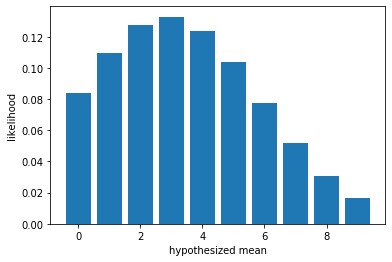

In [39]:
fig, ax = plt.subplots()
ax.bar(range(10), likelihood)
ax.set_xlabel('hypothesized mean')
ax.set_ylabel('likelihood')

In [40]:
sum(likelihood)

0.8577948686217859

**Question:** Do these add to one?

Which of these hypotheses has the maximum likelihood of producing the data?

If we were a Frequentist, we'd go with that, and then we'd construct a confidence interval, giving a range that (had we sampled from the data many times) has a certain probability (maybe 95%) of including the actual value.

But today we're all going to be Bayesians, which means we're going to assign probabilities of each hypothesis being true.

The tough part of being a Bayesian is we need to start out with a prior probabilities. For this, we'll assume that all the probabilities are equal. You chose them that way using the computer, so that works out, but if you'd picked a number from your head, and you liked some numbers more than others, that might not be best.

The arbitrary choice of priors is probably **the largest criticism** of Bayesian statistics. But if you have enough data it doesn't matter that much.

In [41]:
probs = np.ones(10)/10
probs

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Now we need to multiple each of these by the likelihood...

In [54]:
for i in range(10):
    probs[i] *= stats.norm(i, sd).pdf(datum)
probs

array([3.82184722e-07, 1.18069814e-05, 1.87272833e-04, 1.52503928e-03,
       6.37613674e-03, 1.36868832e-02, 1.50841848e-02, 8.53511692e-03,
       2.47951905e-03, 3.69824577e-04])

...and then divide normalize them by dividing them each by the sum:

In [56]:
probs.sum()

0.9999999999999999

In [55]:
probs /= probs.sum()
probs

array([7.91991468e-06, 2.44673007e-04, 3.88080626e-03, 3.16029926e-02,
       1.32131025e-01, 2.83629724e-01, 3.12585642e-01, 1.76871010e-01,
       5.13824289e-02, 7.66377861e-03])

So again, what we've done is multiplied each of the prior probabilities by the likelihood of each hypothesis of generating the observed data, and divided these all by the normalizing constant, to get the posterior probabilities.
$$\begin{align}
P(H_i|\mathbf{X}) & = \frac{P(\mathbf{X}|H_i) P(H_i)}{P(\mathbf{X})}\\
         & = \frac{P(\mathbf{X}|H_i) P(H_i)}{\sum_{j=0}^{n} P(\mathbf{X}|H_j) P(H_j)}
\end{align}
$$

**Question:** what are those terms called again?

Let's see what we got for the **probabilities**.

The probability of N(0, 3) being correct is 0.0978
The probability of N(1, 3) being correct is 0.1274
The probability of N(2, 3) being correct is 0.1485
The probability of N(3, 3) being correct is 0.1549
The probability of N(4, 3) being correct is 0.1446
The probability of N(5, 3) being correct is 0.1207
The probability of N(6, 3) being correct is 0.0902
The probability of N(7, 3) being correct is 0.0603
The probability of N(8, 3) being correct is 0.0361
The probability of N(9, 3) being correct is 0.0193


Text(0, 0.5, 'posterior probability')

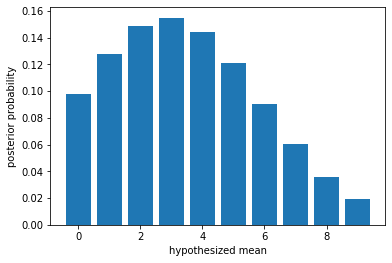

In [44]:
for i in range(0,10):
    print("The probability of N({0}, {1}) being correct is {2:6.4f}"
           .format(i, sd, probs[i]))

fig, ax = plt.subplots()
ax.bar(range(10), probs)
ax.set_xlabel('hypothesized mean')
ax.set_ylabel('posterior probability')

In [45]:
sum(probs)

0.9999999999999999

**Question:** Do these add up to one?

Okay, that was great, but maybe we should get some more data. Generate another number!

In [52]:
stats.norm(mu, sd).rvs()

9.3653838042955

Now we
 * calculate the likelihoods,
 * multiply these **by our old posterior probabilities** (which are the new priors),
 * normalize (divide the sum of the prior times likelihood, so they add to one), and
 * look at the output.

[7.91991468e-06 2.44673007e-04 3.88080626e-03 3.16029926e-02
 1.32131025e-01 2.83629724e-01 3.12585642e-01 1.76871010e-01
 5.13824289e-02 7.66377861e-03]
The probability of N(0, 3) being correct is 0.00000013
The probability of N(1, 3) being correct is 0.00001047
The probability of N(2, 3) being correct is 0.00039809
The probability of N(3, 3) being correct is 0.00695114
The probability of N(4, 3) being correct is 0.05576320
The probability of N(5, 3) being correct is 0.20552040
The probability of N(6, 3) being correct is 0.34799865
The probability of N(7, 3) being correct is 0.27071705
The probability of N(8, 3) being correct is 0.09675403
The probability of N(9, 3) being correct is 0.01588685


Text(0, 0.5, 'posterior probability')

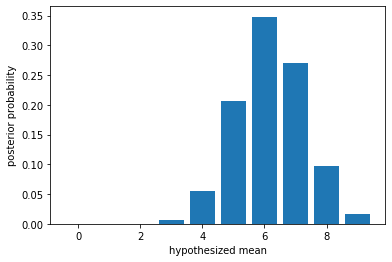

In [57]:
datum = 9.365
print(probs)
for i in range(10):
    probs[i] *= stats.norm(i, sd).pdf(datum)
probs /= probs.sum()#normalizing constant

for i in range(0,10):
    print("The probability of N({0}, {1}) being correct is {3:10.8f}"
           .format(i, sd, datum, probs[i]))

fig, ax = plt.subplots()
ax.bar(range(10), probs)
ax.set_xlabel('hypothesized mean')
ax.set_ylabel('posterior probability')

We're doing this iteratively, repeatedly getting another data point and updating our prior, but we could have done this all at once, calculating the likelihood of seeing the whole dataset.

In a real problem we'd have *many* more possible hypotheses. In the case above, we might not know the number came from a discrete distribution so we'd need to consider every possible value. And we probably wouldn't know the standard deviation, so we'd need to consider every combination of a mean and standard deviation. We could follow the same approach, calculating the likelihood of seeing our data for each possible hypothesis and updating the posterior probabilities. Later we'll talk about how to solve this practically.